# Clean, read, TFIDF vectorize additional recipes from the internet

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

### Get all of the ingredients sections from each group of recipes

In [23]:
with open('Data/EightPortions/recipes_raw_nosource_epi.json') as r:
    data = json.load(r)

In [24]:
others = pd.DataFrame(data)

In [25]:
others.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [26]:
sames = others.T

In [27]:
ingreds3 = sames['ingredients']

In [28]:
ingreds3

05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby    [12 egg whites, 12 egg yolks, 1 1/2 cups sugar...
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S    [18 fresh chestnuts, 2 1/2 pounds veal stew me...
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26    [2 tablespoons unsalted butter, softened, 4 or...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u    [3/4 pound Stilton, crumbled (about 3 cups) an...
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G    [2 cups (about 9 1/2 ounces) whole almonds, to...
                                                         ...                        
lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK    [5 cups (about) canned beef broth, 1 cup lenti...
EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC    [1/2 teaspoon turmeric, 2 cups water, 3/4 poun...
aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe    [1 medium jalapeño, thinly sliced, 2 garlic cl...
fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe    [1 1/2 cups almond flour or almond meal, 1/2 c...
qznqHiNpq0AB1AYn002A2HvaEFnN0lq    [1 1/2 pounds plum tomatoes, coarsely chopped ...
Name: ingredients, Length: 25323, dtype: object

In [29]:
ingredients = [ingreds, ingreds2, ingreds3]

In [31]:
ingrediento = pd.concat(ingredients)

In [32]:
#ingrediento.to_csv('Rec_Ing_8Port.csv')

### Remove numbers and use stop words to whittle down to just food ingredients

In [13]:
# Issues with encoding. 'Latin-1' is the only one that doesn't throw an error.
labeled_docs = pd.read_csv("Recs_Docs.csv", encoding="latin-1", error_bad_lines=False)

In [3]:
# Read externally defined stop words
stopper = pd.read_csv("nonsense_ingredients.csv", encoding="latin-1", error_bad_lines=False)
stopper = stopper.reset_index()
stops = stopper['0']


In [35]:
labeled_docs.head()

,Ingredients
0,"['1/2 cup celery, finely chopped', '1 small gr..."
1,"['2 pounds skirt steak, cut into 1/2-inch dice..."
2,"['1 1/2 cups dried black beans, picked over an..."
3,"['1 1/4 pounds ground chuck', 'One 15-ounce ca..."
4,"['1 cup rice, brown, medium-grain, cooked', '1..."


In [14]:
# Remove numbers, append each ingredients recipes to a list
import re
import string
truncs = []
for doc in labeled_docs['Ingredients']:
    truncs.append(re.sub('\w*\d\w*', '', doc))

In [9]:
# Externally defined stop words list comprehension
stops = [stop for stop in stops]

In [82]:
# Internally defined stop words
please_stop = ['chopped', 'crushed', 'diced', 'seeded', 'ground', 'sliced', 'grated', 'roasted', 'softened',
               'salted', 'unsalted', 'mixed', 'blanched', 'cooked', 'uncooked', 'peeled', 'unpeeled', 'halved',
               'dried', 'cleaned', 'prepared', 'pasteurized', 'cubed', 'powdered', 'drained', 'undrained',
               'smashed', 'halved', 'quartered', 'squeezed', 'spiced', 'cut', 'uncut', 'melted', 'juiced',
               'granulated',
               
               'finely', 'coarsely', 'roughly', 'freshly', 'thinly', 'thickly',
               
               'pound', 'pounds, ''teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'tbs', 
               'dash', 'dashes', 'pinch', 'pinches', 'piece', 'pieces',
               'dollop', 'cubes', 
               'inch', 'inches', 'cup', 'cups', 'ounce', 'oz', 'ounces', 'can', 
               'half', 'quarter', 'one', 'two',
               
               'kosher', 'fresh', 'small', 'large', 'liquid', 'dry', 'dark', 'white', 'crusty', 'medium', 
               'raw', 'sharp', 'sweet', 'baby', 'long', 'wide', 'flat-leaf', 'extra', 'virgin', 'thick',
               'optional', 'heavy', 'warm', 'cold',
               
               'and', 'into', 'the', 'for', 'with', 'less', 'more', 'without', 'see', 'know-how', 'below',
               'about', 'good', 'or', 'all', 'follow', 'follows', 'only',
               
               'serving', 'servings', 'reserving', 'suggestion', 'garnish', 'leaf', 'leaves', 'grain', 
               'peel', 'seed', 
               'stick', 'pods', 'drizzling', 'sprig', 'sprigs', 'head', 'stalk', 'stalks', 'wedges', 'wedge',
               'clove', 'cloves', 'seasoning', 'wing', 'wings', 'breast', 'breasts', 'thigh', 'thighs', 'leg',
               'legs', 'fillet', 'fillets', 'frying', 'product', 'powder', 'strip', 'strips', 'purpose', 'recipe',
               'pieces', 'bag', 'cooking', 
               
               'asian', 'oriental', 'french', 'italian', '_gravií', 'accentsä',
               'ës', 'ët', 'ëthick', 'í_a', 'íâme', 'íæ', 'íç', 'íçngel', 'íçrbol',
               'íó', 'äóîbut', 'äóîusing', 'äóñ', 'äóñounce', 'äóô', 'ë_', 'ë_me', 'ëfoot',
               'ëinch', 'ëll', 'ác', 'áf', 'áto', 'áäó', 'äó', 'äó_', 'äóî']

In [2]:
# Both stop words lists together
big_stop = set(stops + please_stop)

NameError: name 'stops' is not defined

In [ ]:
# Save final stop word list for ease of loading
#pd.Series([big_stop]).to_csv('ing_stop_words.csv')

### Tfidf Vectorization of recipe list with stop words

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
rec_tfidf = TfidfVectorizer(stop_words=big_stop)
X = rec_tfidf.fit_transform([doc for doc in truncs])
rec_vec = pd.DataFrame(X.toarray(), columns=rec_tfidf.get_feature_names())

In [89]:
rec_vec

,abalone,absinth,absinthe,aburaage,aburage,acacia,acadoä,acai,acerola,aceto,...,zests,zhoug,zin,zinfandel,zinfindel,zingermans,ziti,zucchini,zucchinis,zuchinni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Save tfidf vectorized recipes
#rec_vec.to_csv('rec_tfidfs.csv')

### Find a good number of clusters, then cluster tfidf recipes

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# Load recipe tfidf here
data = rec_vec

In [96]:
# Define cluster function
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters


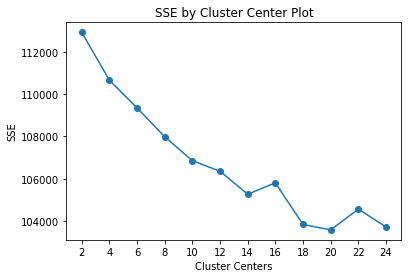

In [100]:
find_optimal_clusters(data, 24)

In [ ]:
# Elbow at 14, we'll stick with 14

In [102]:
# Label all recipes to with its cluster
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(data)

In [112]:
# Save the cluster labels
#pd.Series(clusters).to_csv('TFIDF_Cluster_Labels.csv')

## Create a histogram for our clusters

In [5]:
cluster_labels = pd.read_csv('TFIDF_Cluster_Labels.csv')

In [81]:
cluster_labels['0'].value_counts()

0     21320
10    15191
7     12298
2     10327
8      9029
9      8680
4      8457
12     7829
3      7047
11     7005
5      5200
6      4936
13     3993
1      3335
Name: 0, dtype: int64

In [9]:
label_hist = cluster_labels['0'].value_counts()

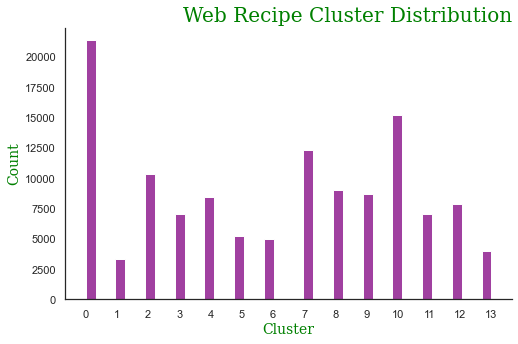

In [32]:
sns.set_theme(style="white",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.histplot(cluster_labels['0'], color='purple')
plt.title('Web Recipe Cluster Distribution',family='serif',fontsize = 20,
          loc='right',color='g')
plt.xlabel('Cluster',fontsize = 14,family='serif', color='g')
plt.ylabel('Count',fontsize = 14,family='serif', color='g')
;

#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(np.arange(0,14));
#plt.savefig('web_rec_clusters.png')

## Create a histogram from the Nature data as well showing the class imbalance

In [34]:
# Red in 
regions = pd.read_csv('region_recs.csv')

In [43]:
new_reg = regions.groupby('Region').count()

In [52]:
new_reg

,Unnamed: 0
Region,
African,352
EastAsian,2512
EasternEuropean,381
LatinAmerican,2917
MiddleEastern,645
NorthAmerican,41524
NorthernEuropean,250
SouthAsian,621
SoutheastAsian,457


In [76]:
reglabels = ['African', 'EastAsian', 'EasternEuropean', 'LatinAmerican', 
           'MiddleEastern',  'NorthAmerican',  'NorthernEuropean',
           'SouthAsian', 'SoutheastAsian', 'SouthernEuropean', 
           'WesternEuropean']

In [66]:
reglabs = ['AF', 'EA', 'EE', 'LA', 'ME', 'NA', 'NE', 'SA', 'SEA', 'SE', 'WE']

<ipython-input-80-c8f8d7fded80>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(reglabs)


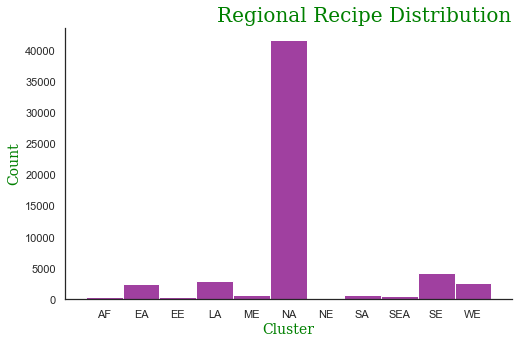

In [80]:
sns.set_theme(style="white",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.histplot(regions.Region, color='purple')
plt.title('Regional Recipe Distribution',family='serif',fontsize = 20,
          loc='right',color='g')
plt.xlabel('Cluster',fontsize = 14,family='serif', color='g')
plt.ylabel('Count',fontsize = 14,family='serif', color='g')
ax.set_xticklabels(reglabs)
#plt.legend(reglabels,loc = 0);

#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks(reglabs);
plt.savefig('region_rec_clusters.png')

In [12]:
label_hist.index

Int64Index([0, 10, 7, 2, 8, 9, 4, 12, 3, 11, 5, 6, 13, 1], dtype='int64')